In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [22]:
dataset = pd.read_csv("bank-additional-full.csv")

In [23]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [24]:
dataset = dataset.drop(['emp.var.rate','nr.employed', 'duration'], axis=1)

In [25]:
dataset.shape

(41188, 18)

In [26]:
dataset.describe()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,93.575664,-40.502600,3.621291
std,10.42125,2.770014,186.910907,0.494901,0.578840,4.628198,1.734447
min,17.00000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000
25%,32.00000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000
50%,38.00000,2.000000,999.000000,0.000000,93.749000,-41.800000,4.857000
75%,47.00000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000
max,98.00000,56.000000,999.000000,7.000000,94.767000,-26.900000,5.045000


In [27]:
dataset['y'] = dataset['y'].eq('yes').mul(1)
dataset['default'] = dataset['default'].eq('yes').mul(1)
dataset['housing']= dataset['housing'].eq('yes').mul(1)
dataset['loan']= dataset['loan'].eq('yes').mul(1)

In [28]:
# Perform one hot encoding for the JOB, Education, Month, and Weekday columns
dataset = pd.get_dummies(dataset, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'])


In [29]:
#Splitting independent/dependent data
#y = dataset['y']
#print(y)
#X = dataset.iloc[:,:-1].values
#print(X)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 55 columns):
age                              41188 non-null int64
default                          41188 non-null int32
housing                          41188 non-null int32
loan                             41188 non-null int32
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
y                                41188 non-null int32
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired          

In [31]:
dataset.shape

(41188, 55)

In [32]:
# Defining Dependent and Independent values
#X = dataset.iloc[:,:-1].values 
#y = dataset.iloc[:,-1].values 

In [35]:
#balance using SMOTE
X = dataset.loc[:, dataset.columns != 'y']
y = dataset.loc[:, dataset.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y = os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no term in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of term",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no term data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of term data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))
X = os_data_X
y = os_data_y

length of oversampled data is  51158
Number of no term in oversampled data 25579
Number of term 25579
Proportion of no term data in oversampled data is  0.5
Proportion of term data in oversampled data is  0.5


In [36]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [37]:
# Scaling
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [38]:
dataset

,age,default,housing,loan,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,0,1,999,0,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
1,57,0,0,0,1,999,0,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
2,37,0,1,0,1,999,0,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
3,40,0,0,0,1,999,0,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
4,56,0,0,1,1,999,0,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
5,45,0,0,0,1,999,0,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
6,59,0,0,0,1,999,0,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
7,41,0,0,0,1,999,0,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
8,24,0,1,0,1,999,0,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
9,25,0,1,0,1,999,0,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0


In [45]:
#Applying PCA
#from sklearn.decomposition import PCA
#pcaObj = PCA(n_components=None)
#X_train = pcaObj.fit_transform(X_train)
#X_test = pcaObj.transform(X_test)
#components_variance = pcaObj.explained_variance_ratio_
#cumulative_variance = pcaObj.explained_variance_ratio_.cumsum()
#print(components_variance)
#print(cumulative_variance)

In [48]:
#Fitting Logistic Regression to Training Set
classifierObj= LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train.values.ravel())

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

IndexError: too many indices for array

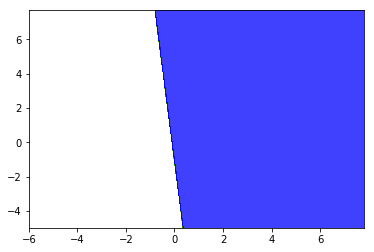

In [49]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('white', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'black','green'))(i), label = j)
plt.title('Logistic Regression w/ One Hot Encoding (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
#Prediction on the Test Set
y_pred= classifierObj.predict(X_test)

In [51]:
#Fitting Logistic Regression to Training Set

classifierObj= LogisticRegression(random_state=5)
classifierObj.fit(X_train, y_train.values.ravel())

#Prediction on the Test Set
y_pred= classifierObj.predict(X_test)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
# Score Method to print accuracy of the model
score = classifierObj.score(X_test, y_test)
print ('score: ',score)

score:  0.6959864477456346


In [53]:
#accuracy scores
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.6959864477456346


In [55]:
#mean squared error
mse = mean_squared_error(y_test, y_pred)
print('MSE: ',mse)

MSE:  0.3040135522543654


In [56]:
#r2
r2 = r2_score(y_test, y_pred)
print('r2_score: ',r2)

r2_score:  -0.21606513269618888


In [423]:
components_variance


array([0.10294107, 0.04922175])

In [57]:
#accuracy scores
classification_report = classification_report(y_test, y_pred)
print('classification report: ', classification_report)


classification report:                precision    recall  f1-score   support

           0       0.68      0.75      0.71      7651
           1       0.72      0.65      0.68      7697

   micro avg       0.70      0.70      0.70     15348
   macro avg       0.70      0.70      0.70     15348
weighted avg       0.70      0.70      0.70     15348



In [58]:
#Fig 4 from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

count_no_sub = len(dataset[dataset['y']==0])
count_sub = len(dataset[dataset['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [426]:
dataset.groupby('y').mean()

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
y,,,,,,,,,,,,,,,,,,,,,
0,39.911185,0.000082,0.521752,0.152266,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,...,0.011027,0.008591,0.191009,0.209779,0.207344,0.195277,0.196591,0.099787,0.887107,0.013106
1,40.913147,0.000000,0.540302,0.147198,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,...,0.067888,0.055172,0.182328,0.182543,0.225216,0.205388,0.204526,0.130388,0.676940,0.192672


In [427]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies= cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print('K Folds Mean:', modelAccuracies.mean())
print('K Folds Standard Deviation:', modelAccuracies.std())

C:\Users\BigData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BigData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BigData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BigData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BigData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

K Folds Mean: 0.8956332664374443
K Folds Standard Deviation: 0.002288316701854574


C:\Users\BigData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BigData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
